## Exercise 2.2: Multi class classification


The multi-class percpetron can be implemented this way. 
We denote $K$ the number of classes, $N$ the number of (training) examples, $D$ the dimension of the data (after feature augmentation, at least with a "1" as first component).

The **output** of the network *(not equal to the predicted label)*, can be taken as the **softmax** among the $K$ separating hyperplanes (each hyperplane $\vec{w}_k$ separates class $k$ from the others).
$$ y_k^{(n)} = \text{softmax}\big( (\vec{w}_{k} \cdot \vec{x}^{(n)})_{k=1...K} \big) = \frac{ \exp(  \vec{w}_k\cdot\vec{x}^{(n)}   )}{\sum_\ell \exp(  \vec{w}_\ell\cdot\vec{x}^{(n)})}$$
This output can be **interpreted as the probability** that example $x^{(n)}$ belongs to the class $k$, according the classifier's current parameters
Indeed, one can easily check that for any $\vec{x}$, the sum of probabilities is indeed one : $\sum_k y_k = 1$.
The **total output of the network** is a vector $\vec{y}^{(n)} = \begin{pmatrix}y_1^{(n)} \\ y_2^{(n)} \\ .. \\ y_K^{(n)} \end{pmatrix}$ (for the sample number $n$).

The **true labels (ground truth)** of example $\vec{x}^{(n)}$ is then encoded as a one-hot vector, so that if the example is of the second class, it may be written: $\vec{t}^{n} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ .. \\ 0 \end{pmatrix}$. (where $\vec{t}^{(n)}$ or $\vec{t}^{n}$ is for **T**ruth and is shorter to write than $\vec{y}^{GT,(n)}$). More generally, the components $t_{n,k}$ of vector $\vec{t}_n$ may be written using the Kronecker's delta: $t_{n,k} = \delta(k, k_{true}^n)$, where $k_{true}^n$ is the true class of example number $n$.

From now on, **we drop the superscrip $a^{(n)}$ and instead write $a_n$ or just $a$**, when it's clear enough that the quantity $a$ relates to a single example, of generic index $n$. This helps to lighten the notations.

The Loss function that we should use is called the **cross-entropy loss function**, and is:

$$J = \frac1N \sum_n^N H(\vec{t}_{n}, \vec{y}_{n})$$

where the cross-entropy is a non-symmetric function: $$H(\vec{t}_{n}, \vec{y}_{n}) = -\sum_k^K t_{n,k} \log (y_{n,k})$$ 

Make sure you undersand all of the above. Write down the Loss function for the multi-class perceptron. 
### Part 2.1
- What are the parameters of the model ? **How many real numbers is that ?** Count them in terms of $N,K,D, etc$. 
- (3-4 points) **Derive the update steps for the gradient**. (you can get inspiration from TD4.1)
- Some Hints:
    - It is recommended to compute the quantity $\nabla_{w_\ell} y_k$ ($\ell\neq k$) and the quantity $\nabla_{w_k} y_k$. Try to express these simply, by recognizing $y$ when it appears. First treat the two cases separately, then try to unite the two cases in a single mathematical form, using Kronecker's delta : $\delta(i,j)= \{1$ if $i=j$, else $0\}$.
    - When there is a sum $\sum_\ell f(w_\ell)$ and you derive with respect to $w_k$, the output only depends on the term $f(w_k)$ 
    - In the sum above, $\sum_\ell f(w_\ell)$ the index $\ell$ is a "mute" index: you can use any letter for it. Be careful not to use a letter that already exists outside the sum ($\ell$ is like a local variable, don't use the same name for a "global variable" from outside the function !)
    - For any functions $u,v$ that admit derivatives, $\partial_x \frac{u(x)}{v(x)} = \frac{u'(x)v(x)-u(x)v'(x)}{(v(x))^2}$. It extends to $\nabla_x$ without problem.
    - $\nabla_x \exp(u(x)) =  \exp(u(x)) \nabla_x u(x)$.
    - $\frac{a}{1+a} = 1- \frac{1}{1+a}$
    - $\partial_x \log(u(x)) = \frac{u'(x)}{u(x)}$ 
    - If you are too much blocked, you can ask me (via discord, in Private Message) for the solution of $\nabla_{w_k} y_k$ and/or the solution for $\nabla_{w_\ell} y_k$ ($\ell\neq k$).
    - In the end, the update step for the parameters that you should find is : $$ \vec{w}_\ell \mapsto \vec{w}_\ell + \eta \frac1N \sum_n^N \vec{x}_n (\delta_{\ell, k_{true}^n}- y_{\ell,n})$$
    - If you cannot find the equation above, you can just skip this question and use it to make your program.
    
    

### Part 2.2
- (3 points) **Think up of all the functions you need to write**, and **put them in a class** (you can get inspiration from the correction of TP3.2) - first write a class skeleton, and **only then, write the methods** inside
- Hints:
    - there may be numerical errors (NaNs) because $\exp(..)$ is too large. You can ease this by noticing the following: for any positive constant $C$, we have $$\frac{ \exp( a_k  )}{\sum_\ell \exp (a_\ell) }  = \frac{C \exp( a_k  )}{C \sum_\ell \exp (a_\ell) }= \frac{\exp( a_k +\log C )}{\sum_\ell \exp (a_\ell +\log C) }$$
    - with this trick, when your arguments in the softmax are too large, you can simply subtract a big constant $\log C$ from its argument, and this will reduce the chances of numerical error, without changing the result. It's a good idea to change the $w $'s with this kind of trick.
    - it's a good idea to define the target labels (ground truth) data in one-hot vectors (as said above), compute them once and for all, and then you never have to compute them again. In practice, you may notice that for an example with label $k_{true}$, then the genreic component number of $k$ of the vector $\vec{t}$ reads: $t_{k} = \delta_{k, k_{true}}$
    - the initial $w$ should be random (not all zeros), preferably, but not too big. A good idea is to have their dispersion be of order $1/D$ at most.
    
For this question, the main goal is to make a theoretically-working, rather clean code, using numpy array-operations (`np.dot`) and not loops, as much as possible. If you manage to do that, you will most likely have a working code (and fast code!)
- (1 point) Test your algorithm on Fashion-MNIST: make a train / validation / test split , fit the model, compute the cross-val error, and the test error. Don't waste time on optimizing hyper-parameters (just take an $\eta$ small enough that you kind of converge. The goal is really to prove that your algorithm does not always crash :)

In [1]:
## remark:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
def one_hot_encode(X):
    unique_val = np.sort(np.unique(X))
    
    Y = np.zeros((len(X), len(unique_val)))
    for i in range(len(X)):
        idx = np.where(unique_val == X[i])
        Y[i, idx] = 1

    return Y

In [3]:
dataset = datasets.load_digits()
data    = dataset['data']
labels  = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(data, one_hot_encode(labels), test_size=0.33, random_state=42)

In [4]:
class network:
    def __init__(self, n_class, n_dims):
        self.weights = np.random.rand(n_dims, n_class)/n_dims

    # inference functions:
    def inference(self, x):
        # utility function:
        def softmax(y):
            offset = np.max(y.T, axis=0)
            exp_y  = np.exp(y.T - offset)
            exp_y  = exp_y/np.sum(exp_y, axis=0)
            return exp_y.T
            
        predictions = x @ self.weights
        predictions = softmax(predictions)
        return predictions
    def hard_inference(self, x):
        predictions     = self.inference(x)
        hard_prediction = np.argmax(predictions, axis=1)
        return hard_prediction

    # train functions:
    def train(self, x, t, rate=0.01):
        predictions       = self.inference(x)
        prediction_delta  = t - predictions
        x_time_prediction = np.expand_dims(x, 2)*np.expand_dims(prediction_delta, 1)
        delta_weights     = np.mean(x_time_prediction, axis=0)
        self.weights      = self.weights + rate*delta_weights

    # test functions:
    def test_entropy(self, x, t):
        predictions = self.inference(x)
        h           = -np.log(predictions)*t
        H           = np.sum(h, axis=1)
        H_tot       = np.mean(H)
        return H_tot
    def test_accurcay(self, x, t):
        hard_prediction = self.hard_inference(x)
        if len(t.shape) == 2:
            t = np.argmax(t, axis=1)
        return np.mean(hard_prediction == t)

In [5]:
net = network(Y_train.shape[1], X_train.shape[1])

print(net.test_accurcay(X_test, Y_test))

for rate in [0.5, 0.2, 0.1, 0.05, 0.05, 0.01, 0.001]:
    net.train(X_train, Y_train, rate)
    print(net.test_accurcay(X_test, Y_test))

0.12794612794612795
0.2255892255892256
0.2558922558922559
0.5168350168350169
0.5572390572390572
0.5707070707070707
0.5993265993265994
0.601010101010101


In [6]:
from keras.datasets import fashion_mnist

(trainX3d, trainYraw), (testX3d, testYraw) = fashion_mnist.load_data()

trainY, testY = one_hot_encode(trainYraw), one_hot_encode(testYraw)
trainX, testX = trainX3d.reshape(trainX3d.shape[0], 28*28), testX3d.reshape(testX3d.shape[0], 28*28)

2024-01-23 12:58:56.492552: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 12:58:56.555004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 12:58:56.555079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 12:58:56.557119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 12:58:56.568247: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 12:58:56.569782: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [10]:
net_fashion = network(trainY.shape[1], trainX.shape[1])

print(net_fashion.test_accurcay(testX, testY))

for rate in [0.1, 0.1, 0.1, 0.1, 0.05, 0.01, 0.005]:
    net_fashion.train(trainX[:15000], trainY[:15000], rate)
    print(net_fashion.test_accurcay(testX, testY))

0.091
0.2961
0.225
0.1891
0.3009
0.3413
0.4663
0.4548


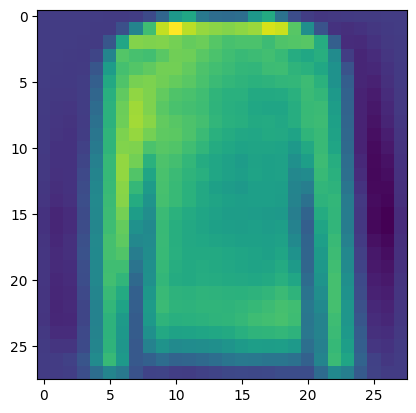

In [14]:
from matplotlib import pyplot as plt

plt.imshow(net_fashion.weights[:, 2].reshape(28, 28))